In [9]:
import numpy as np
import matplotlib.pyplot as plt
import MARIGOLD as mg
import os
import openpyxl as op

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
author = 'quan'
refetch = True
xl_compare = False
multiplot = True

z_step = 0.01

iate_method = None
cd_method = 'err_iter'
C_inf = 1
debug = False

In [11]:
if author == 'ryan':
    endpoints = [110]
    modes = [None]

elif author == 'quan':
    # endpoints       = [114.63, 14.137+14.137+9.25+114.63, 125.63+114.63+14.137+14.137+9.25]
    # modes           = [None, 'ubend', None]

    endpoints       = [110, 130, 146, 226]
    modes           = [None, 'elbow', 'elbow', None]

    # endpoints       = [110, 146, 226]
    # modes           = [None, 'ubend', None]

    # endpoints = [226]
    # modes = ['vd']

elif author == 'bettis':
    endpoints = [155.51]
    modes = [None]


In [12]:
if author == 'ryan':
    cwd = os.path.abspath("H:\TRSL-H\IATE\Data\spreadsheets\\25.4mm_ryan")
    # print(cwd)
    dat_to_fetch = 'database_r.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='ryan_template')

elif author == 'quan':
    cwd = os.path.abspath("H:\TRSL-H\IATE\Data\spreadsheets\\25.4mm_quan_2")
    # print(cwd)
    dat_to_fetch = 'database_q.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='adix_template')

elif author == 'yadav':
    cwd = os.path.abspath("H:\TRSL-H\IATE\Data\spreadsheets\\50.8mm")
    # print(cwd)
    dat_to_fetch = 'database_y.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='yadav_template')

elif author == 'bettis':
    cwd = os.path.abspath("H:\TRSL-H\IATE\Data\Data_Summary_OneGroup")
    print(cwd)
    dat_to_fetch = 'database_b.dat'

    if refetch:
        mg.extractLocalDataFromDir(cwd, dump_file=dat_to_fetch, sheet_type='bettis_template', debug=True)

else:
    database = mg.loadProbeData('./database.dat')
    print(database)

database = mg.loadProbeData(dat_to_fetch)

list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range


In [13]:
# Unique flow condition finding, for plotting
cmap = []
lmap = []
for i, cond in enumerate(database):
    cmap.append([cond.theta, cond.jf, cond.jgref])
    lmap.append(cond.LoverD)
cmap = np.array(cmap)
umap = np.unique(cmap,axis=0)
sp = np.min(lmap)

if author == 'quan' and modes == ['vd']:
    sp = 146

H90: 0.111
I90: 0.185

Results match really well with Drew's MATLAB suite, using opt = 3 and continuity
Void fraction matches with Drew's opt = 2, but TI seems low for run I90 and high for run H90 -- must be something with the Weber number criterion

jf=0.7_jgloc=0.33_theta=90.0_port=P1_adix


C:\Users\kang284\AppData\Local\Temp\ipykernel_14560\1442228703.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p_idx = int(np.where((umap == cmap[i]).all(axis=1))[0])


jf=0.7_jgloc=0.35_theta=90.0_port=P2_adix
jf=0.7_jgloc=0.37_theta=90.0_port=P3_adix
jf=0.7_jgloc=0.37_theta=90.0_port=P4_adix
jf=0.7_jgloc=0.37_theta=90.0_port=P5A_adix
jf=0.7_jgloc=0.36_theta=90.0_port=P5B_adix
jf=0.7_jgloc=0.33_theta=90.0_port=P6_adix
jf=0.7_jgloc=0.33_theta=90.0_port=P7_adix
jf=2.0_jgloc=0.10_theta=90.0_port=P1_adix
jf=2.0_jgloc=0.11_theta=90.0_port=P2_adix
jf=2.0_jgloc=0.12_theta=90.0_port=P3_adix
jf=2.0_jgloc=0.12_theta=90.0_port=P4_adix
jf=2.0_jgloc=0.12_theta=90.0_port=P5A_adix
jf=2.0_jgloc=0.11_theta=90.0_port=P5B_adix
jf=2.0_jgloc=0.10_theta=90.0_port=P6_adix
jf=2.0_jgloc=0.10_theta=90.0_port=P7_adix
jf=2.0_jgloc=0.33_theta=90.0_port=P1_adix
jf=2.0_jgloc=0.34_theta=90.0_port=P2_adix
jf=2.0_jgloc=0.38_theta=90.0_port=P3_adix
jf=2.0_jgloc=0.40_theta=90.0_port=P4_adix
jf=2.0_jgloc=0.37_theta=90.0_port=P5A_adix
jf=2.0_jgloc=0.38_theta=90.0_port=P5B_adix
jf=2.0_jgloc=0.33_theta=90.0_port=P6_adix
jf=2.0_jgloc=0.33_theta=90.0_port=P7_adix
jf=2.0_jgloc=0.69_theta=90.0

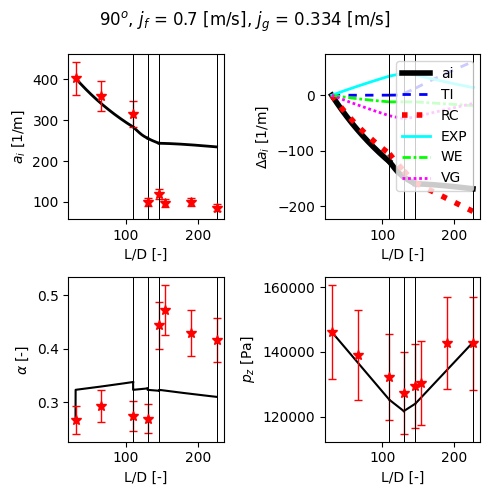

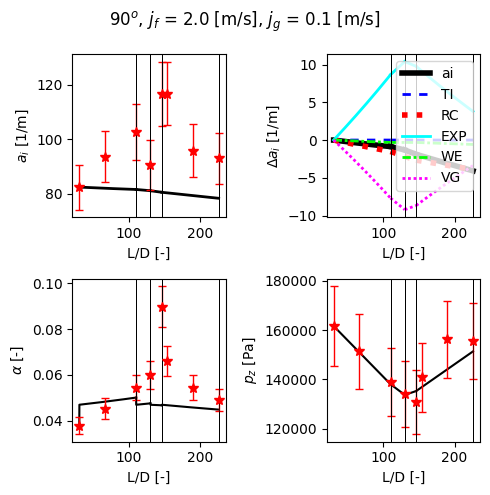

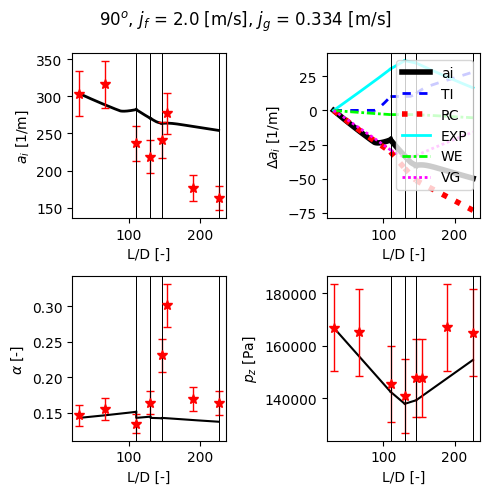

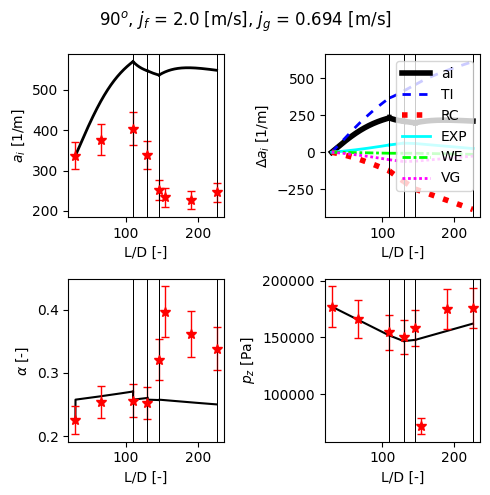

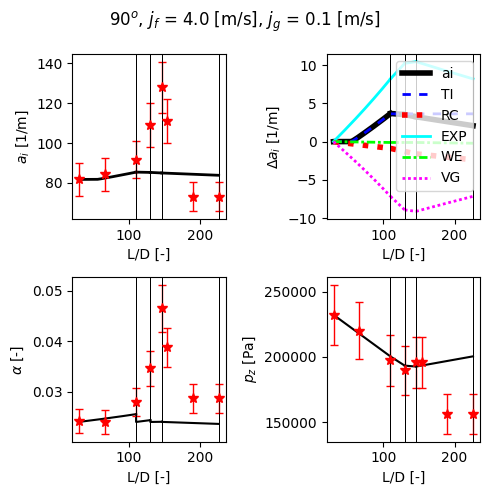

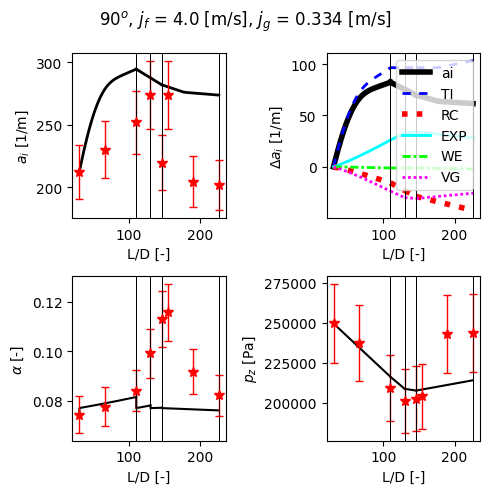

In [14]:
for i, cond in enumerate(database):
    cond:mg.Condition

    print(cond)

    if True:
        if cond.theta == 90 and cond.LoverD < 130:
            cond.mirror(axisym = True)
        else:
            cond.mirror(sym90=True)

        p_idx = int(np.where((umap == cmap[i]).all(axis=1))[0])

        plt.figure(p_idx,figsize=(5,5))
        plt.suptitle("${}^o$, $j_f$ = {} [m/s], $j_g$ = {} [m/s]".format(int(cond.theta),cond.jf,cond.jgref))
        
        ai_st = 0
        if cond.LoverD == sp:
            for ii, cp in enumerate(endpoints):

                if cp > 130:
                    cond.theta = -abs(cond.theta)

                cheat = False

                if modes[ii] == None:
                    dpdz_method     = 'LM'
                    if author == 'quan':
                        LM_C        = 34
                    else:
                        LM_C        = 25
                    k_m             = None

                    void_method = 'pressure_LM'

                elif modes[ii] == 'elbow':
                    dpdz_method     = 'Kim'
                    LM_C            = 40
                    k_m             = 0.1

                    void_method = 'pressure_kim'

                elif modes[ii] == 'ubend':
                    dpdz_method     = 'Kim'
                    LM_C            = 85
                    k_m             = 0.2

                    void_method = 'pressure_kim'

                elif modes[ii] == 'vd':
                    dpdz_method     = 'LM'
                    LM_C            = 68
                    k_m             = None

                    void_method = 'pressure_LM'

                if ii == 0:
                    io = mg.iate_1d_1g(
                        cond, query = cp, z_step = z_step,
                        C_inf = C_inf, dpdz_method = dpdz_method, cd_method = cd_method, void_method = void_method, LM_C = LM_C, k_m = k_m, restriction = modes[ii], cheat = cheat, debug = debug, iate_method = iate_method
                        )
                    
                    label_ai = 'ai'
                    label_ti = 'TI'
                    label_rc = 'RC'
                    label_exp = 'EXP'
                    label_we = 'WE'
                    label_vg = 'VG'
                else:
                    io = mg.iate_1d_1g(
                        cond, query = cp, z_step = z_step, io = io,
                        C_inf = C_inf, dpdz_method = dpdz_method, cd_method = cd_method, void_method = void_method, LM_C = LM_C, k_m = k_m, restriction = modes[ii], cheat = cheat, debug = debug, iate_method = iate_method
                        )
                    
                    label_ai = None
                    label_ti = None
                    label_rc = None
                    label_exp = None
                    label_we = None
                    label_vg = None
                
                z_mesh  = io["z_mesh"]
                ai      = io["ai"]
                aiti    = io["aiti"]
                airc    = io["airc"]
                aiexp   = io["aiexp"]
                aiwe    = io["aiwe"]
                aivg    = io["aivg"]
                alpha   = io["alpha"]
                pz      = io["pz"]

                z_mesh = z_mesh / cond.Dh

                if multiplot:
                    plt.figure(p_idx)
                    plt.subplot(221)
                    plt.plot(z_mesh,ai,'k',linewidth=2)
                    plt.ylabel('$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')

                    plt.figure(p_idx)
                    plt.subplot(222)
                    plt.plot(z_mesh,ai-ai[0]+ai_st,'k',linewidth=4,label=label_ai)
                    plt.plot(z_mesh,aiti,'b',linestyle=(0,(3,3)),linewidth=2,label=label_ti)
                    plt.plot(z_mesh,-airc,'r',linestyle='dotted',linewidth=4,label=label_rc)
                    plt.plot(z_mesh,aiexp,'aqua',linewidth=2,label=label_exp)
                    plt.plot(z_mesh,-aiwe,'lime',linestyle=(0,(3,1,1,1)),linewidth=2,label=label_we)
                    plt.plot(z_mesh,-aivg,'magenta',linestyle=(0,(1,1)),linewidth=2,label=label_vg)
                    plt.legend(loc='upper right')
                    plt.ylabel(r'$\Delta$$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')
                    # plt.ylim(bottom = -10, top = 60)

                    plt.figure(p_idx)
                    plt.subplot(223)
                    plt.plot(z_mesh,alpha,'k')
                    plt.ylabel(r'$\alpha$ [-]')
                    plt.xlabel('L/D [-]')

                    plt.figure(p_idx)
                    plt.subplot(224)
                    plt.plot(z_mesh,pz,'k')
                    plt.ylabel('$p_{z}$ [Pa]')
                    plt.xlabel('L/D [-]')
                    
                else:
                    plt.figure(p_idx)
                    plt.plot(z_mesh,ai,'k',linewidth=4)
                    plt.ylabel('$a_i$ [1/m]')
                    plt.xlabel('L/D [-]')
                    
                ai_st = ai_st + ai[-1] - ai[0]

        perr = 0.1

        if multiplot:
            plt.figure(p_idx)
            plt.subplot(221)
            plt.errorbar(cond.LoverD,cond.area_avg('ai'),cond.area_avg('ai')*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3,label='exp')

            if xl_compare == True and cond.area_avg_ai_sheet != '#REF!':
                plt.figure(p_idx)
                plt.subplot(221)
                plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3,label='exp')

            plt.figure(p_idx)
            plt.subplot(222)

            plt.figure(p_idx)
            plt.subplot(223)
            plt.errorbar(cond.LoverD,cond.area_avg('alpha'),cond.area_avg('alpha')*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3)

            if xl_compare == True and cond.area_avg_void_sheet != '#REF!':
                plt.figure(p_idx)
                plt.subplot(223)
                plt.errorbar(cond.LoverD,cond.area_avg_void_sheet,cond.area_avg_void_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3)

            p = (cond.jgatm * 101325 / cond.jgloc)

            plt.figure(p_idx)
            plt.subplot(224)
            plt.errorbar(cond.LoverD,p,p*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3)

            for iii, cp in enumerate(endpoints):
                plt.figure(p_idx)

                plt.subplot(221)
                plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.subplot(222)
                plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.subplot(223)
                plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

                plt.subplot(224)
                plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

            plt.tight_layout()
        
        else:
            plt.figure(p_idx)
            plt.errorbar(cond.LoverD,cond.area_avg('ai'),cond.area_avg('ai')*perr,fmt='r*',markersize=7,elinewidth=1,capsize=3,label='exp')

            if xl_compare == True and cond.area_avg_ai_sheet != '#REF!':
                plt.figure(p_idx)
                plt.errorbar(cond.LoverD,cond.area_avg_ai_sheet,cond.area_avg_ai_sheet*perr,fmt='bx',markersize=7,elinewidth=1,capsize=3,label='exp')

            for iii, cp in enumerate(endpoints):
                plt.figure(p_idx)
                plt.axvline(x=endpoints[iii],linestyle='-',linewidth=0.5,c='k')

            plt.tight_layout()
            



In [15]:
debug = False

if debug:
    for cond in database:
        cond:mg.Condition

        print(cond)
        with open(f"{cond}.txt", "w") as f:
            cond.pretty_print(print_to_file=True, FID=f)

            cond.plot_contour('alpha',save_dir='./MGDebug/alpha/',show=False,plot_measured_points=True)
            cond.plot_contour('ai',save_dir='./MGDebug/ai/',show=False,plot_measured_points=True)

In [16]:
Db = 6*alpha/ai

print(Db)

[0.0016415  0.00163841 0.00163843 ... 0.00166723 0.00166723 0.00166723]
